<a href="https://colab.research.google.com/github/POOJIKASRI-V-29/ai-urban-flood-risk-visualizer/blob/main/flood_Risk_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()


Saving flood_dataset_classification.csv to flood_dataset_classification.csv


In [2]:
import os
print(os.listdir())


['.config', 'flood_dataset_classification.csv', 'sample_data']


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import joblib

In [4]:
df = pd.read_csv("flood_dataset_classification.csv")
df.head()


,Disaster Type,Latitude,Longitude,Total Deaths,Total Affected,duration,time,Rainfall,Elevation,Slope,distance,occured
0,0,52.6717,-0.2995,300.0,3000.0,0.0,1900,1383.125626,11.0,1.788207,0.0,1
1,0,35.6897,139.6920,1379.0,13790.0,0.0,1909,1383.125626,49.0,24.356508,0.0,1
2,0,39.9050,116.3910,100000.0,1000000.0,0.0,1909,580.345856,55.0,8.374380,0.0,1
3,0,23.1288,113.2590,0.0,3000000.0,0.0,1912,2993.401777,7.0,12.917221,0.0,1
4,0,39.1467,117.2060,0.0,635000.0,0.0,1913,1383.125626,3.0,1.513093,0.0,1


In [5]:
print(df.columns)
print(df.shape)
print(df.info())



Index(['Disaster Type', 'Latitude', 'Longitude', 'Total Deaths',
       'Total Affected', 'duration', 'time', 'Rainfall', 'Elevation', 'Slope',
       'distance', 'occured'],
      dtype='object')
(6237, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6237 entries, 0 to 6236
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Disaster Type   6237 non-null   int64  
 1   Latitude        6237 non-null   float64
 2   Longitude       6237 non-null   float64
 3   Total Deaths    6237 non-null   float64
 4   Total Affected  6237 non-null   float64
 5   duration        6237 non-null   float64
 6   time            6237 non-null   int64  
 7   Rainfall        6237 non-null   float64
 8   Elevation       6237 non-null   float64
 9   Slope           6237 non-null   float64
 10  distance        6237 non-null   float64
 11  occured         6237 non-null   int64  
dtypes: float64(9), int64(3)
memory usage: 584.8 KB
Non

In [6]:
df.describe()


,Disaster Type,Latitude,Longitude,Total Deaths,Total Affected,duration,time,Rainfall,Elevation,Slope,distance,occured
count,6237.000000,6237.000000,6237.000000,6.237000e+03,6.237000e+03,6237.000000,6237.000000,6237.000000,6237.000000,6237.000000,6.237000e+03,6237.000000
mean,0.773930,18.767296,25.577775,3.092211e+03,8.047540e+05,25.897066,1994.058041,1200.677851,604.385537,7.169169,5.440781e+03,0.672118
std,1.257769,23.205920,75.478904,7.709807e+04,7.847980e+06,89.617806,20.522141,1164.591241,855.309741,8.954785,8.607790e+04,0.469479
min,0.000000,-53.162569,-175.273869,0.000000e+00,0.000000e+00,0.000000,1900.000000,0.547090,-29.000000,0.000000,0.000000e+00,0.000000
25%,0.000000,4.868178,-43.415278,0.000000e+00,5.000000e+02,0.000000,1987.000000,489.270857,42.000000,1.854334,0.000000e+00,0.000000
50%,0.000000,22.704752,30.488437,8.000000e+00,5.381000e+03,0.000000,2000.000000,1029.113686,239.000000,3.704792,0.000000e+00,1.000000
75%,2.000000,37.963000,92.340000,4.300000e+01,6.001600e+04,0.000000,2008.000000,1524.737477,839.000000,8.656136,0.000000e+00,1.000000
max,4.000000,69.968735,179.847745,3.700000e+06,3.000000e+08,660.000000,2016.000000,23751.949287,6796.000000,65.991348,1.390229e+06,1.000000


In [7]:
X = df.drop(["occured", "Total Deaths", "Total Affected","Disaster Type", "duration"], axis=1)
y = df["occured"]


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8,random_state=42,stratify=y)


In [15]:
model = RandomForestClassifier(
    n_estimators=100,
    max_depth=8,
    random_state=42
)

model.fit(X_train, y_train)


RandomForestClassifier(max_depth=8, random_state=42)

In [16]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print(f"CV Accuracy: {scores.mean():.3f} ± {scores.std():.3f}")
pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, pred))
print("\nClassification Report:\n", classification_report(y_test, pred))


CV Accuracy: 0.493 ± 0.123
Accuracy: 0.7973947895791583

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.47      0.60      1636
           1       0.79      0.96      0.86      3354

    accuracy                           0.80      4990
   macro avg       0.82      0.71      0.73      4990
weighted avg       0.81      0.80      0.78      4990



In [17]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import numpy as np
mae = mean_absolute_error(y_test, pred)
r2 = r2_score(y_test, pred)
rmse = np.sqrt(mean_squared_error(y_test, pred))

print("Mean Absolute Error (MAE):", mae)
print("R2 Score:", r2)
print("Root Mean Squared Error (RMSE):", rmse)


Mean Absolute Error (MAE): 0.20260521042084167
R2 Score: 0.0805982128407785
Root Mean Squared Error (RMSE): 0.4501168852874125


In [18]:
import numpy as np
unique, counts = np.unique(y, return_counts=True)
print(dict(zip(unique, counts)))


{np.int64(0): np.int64(2045), np.int64(1): np.int64(4192)}


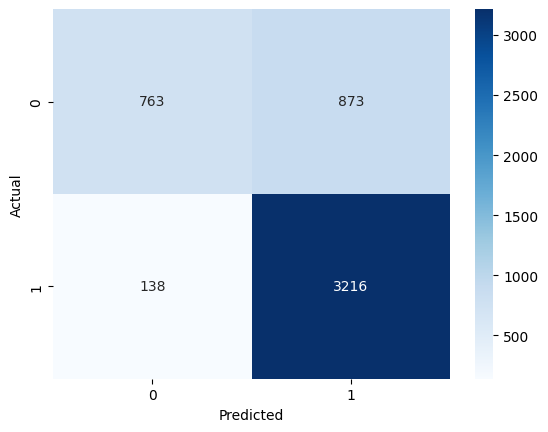

In [19]:
cm = confusion_matrix(y_test, pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

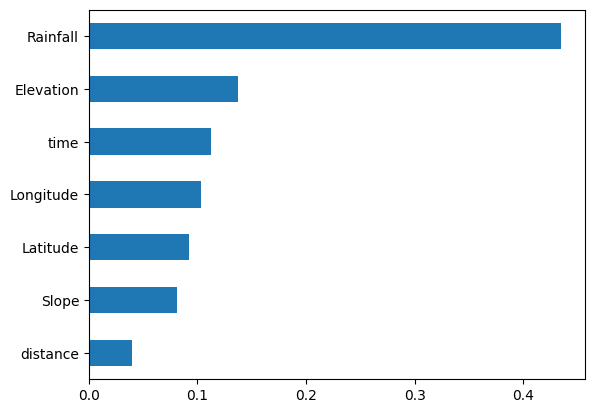

In [20]:
importance = pd.Series(model.feature_importances_, index=X.columns)
importance.sort_values().plot(kind='barh')
plt.show()


In [21]:
joblib.dump(model, "flood_model.pkl")
from google.colab import files
files.download("flood_model.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [22]:
def predict_flood(data):
    prediction = model.predict([data])[0]

    if prediction == 1:
        return "Flood Likely"
    else:
        return "No Flood"


In [23]:
prob = model.predict_proba(X_test)

print(prob[:5])



[[0.24769667 0.75230333]
 [0.18776863 0.81223137]
 [0.15852351 0.84147649]
 [0.12456157 0.87543843]
 [0.24748858 0.75251142]]


In [24]:
def risk_level(prob):
    if prob < 0.3:
        return "Low"
    elif prob < 0.7:
        return "Medium"
    else:
        return "High"


In [ ]:
for p in prob[:10]:
    print("Prob:", round(p[1],3),
          " Risk:", risk_level(p[1]))





Prob: 0.998  Risk: High
Prob: 0.997  Risk: High
Prob: 0.009  Risk: Low
Prob: 1.0  Risk: High
Prob: 0.0  Risk: Low
Prob: 0.0  Risk: Low
Prob: 0.996  Risk: High
Prob: 0.992  Risk: High
Prob: 0.997  Risk: High
Prob: 0.014  Risk: Low


In [ ]:
!pip install folium



In [ ]:
import folium
from folium.plugins import HeatMap



In [ ]:
india_heat_data = []

for i, p in enumerate(prob):
    lat = X_test.iloc[i]["Latitude"]
    lon = X_test.iloc[i]["Longitude"]
    flood_prob = p[1]

    if 8 <= lat <= 37 and 68 <= lon <= 97:
        india_heat_data.append([lat, lon, flood_prob])





In [ ]:
m = folium.Map(
    location=[22.5, 78.9],
    zoom_start=5
)



In [ ]:
HeatMap(
    india_heat_data,
    radius=8,
    blur=10,
    max_zoom=7
).add_to(m)

m